In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil.parser import parse
import matplotlib.pyplot as plt
import time
import matplotlib.pyplot as plt  

# jtplot.style(theme='solarizedl', context='notebook', ticks=True, grid=False)
# theme (str): 'oceans16', 'grade3', 'chesterish', 'onedork', 'monokai', 'solarizedl', 'solarizedd'

## Step 1: combine all data in one df

In [2]:
from platform import python_version

In [3]:
a=pd.read_csv("data/2021/IVS_weekmonitor_04FEB2021.csv", sep=';', parse_dates=[4])

In [4]:
#first identify all files in 2021 folder and save their names
from os import walk
f = []
for (dirpath, dirnames, filenames) in walk('data/2021'):
    f.extend(filenames)
    break

In [5]:
#empty list to store data
li=[]

#read everything in as object for now
for filename in f:    
    df = pd.read_csv("data/2021/"+str(filename), sep=';', index_col=None, header=0, dtype=object)
    if filename != 'IVS_weekmonitor_04FEB2021.csv':
        df.v05_06_begindt_evenement_iso=df.v05_06_begindt_evenement_iso.astype(str)
        for i in df.index:
            df.v05_06_begindt_evenement_iso[i]=parse(df.v05_06_begindt_evenement_iso[i])
        
        df.rename(columns={'v05_06_begindt_evenement_iso':'Date'}, inplace=True)
        
    else:
        df.rename(columns={'v05_06_Begindt_evenement':'Date'},inplace=True)
        
    print(filename,'handled')
    li.append(df)

#create df
df_2021 = pd.concat(li, axis=0, ignore_index=True)

IVS_weekmonitor_02SEP2021.csv handled
IVS_weekmonitor_03JAN2022.csv handled
IVS_weekmonitor_04FEB2021.csv handled
IVS_weekmonitor_04MAR2021.csv handled
IVS_weekmonitor_05AUG2021.csv handled
IVS_weekmonitor_05DEC2021.csv handled
IVS_weekmonitor_05JUL2021.csv handled
IVS_weekmonitor_05JUN2021.csv handled
IVS_weekmonitor_05MAY2021.csv handled
IVS_weekmonitor_05NOV2021.csv handled
IVS_weekmonitor_05OCT2021.csv handled
IVS_weekmonitor_15APR2021.csv handled


In [6]:
#save data
df_2021.to_csv("data/2021/2021_combined.csv")

## Step 2: data cleaning

In [7]:
df_2021 = pd.read_csv('data/2021/2021_combined.csv', index_col=0, header=0)

In [8]:
#check data types
df_2021.dtypes

Jaarmaand                     int64
Jaar                          int64
Maand                         int64
Weeknr                        int64
Date                         object
v05_06_Begindt_evenement     object
UNLO_herkomst                object
UNLO_bestemming              object
v15_1_Scheepstype_RWS         int64
SK_CODE                      object
v18_Laadvermogen            float64
v28_Beladingscode             int64
v38_Vervoerd_gewicht        float64
v30_4_Containers_TEU_S        int64
nstr_nw                     float64
nst2007_nw                   object
dtype: object

In [9]:
#Convert date to datetime format
df_2021.Date = pd.to_datetime(df_2021.Date, utc=True)

In [10]:
#sort by date
df_2021.sort_values(by='Date', inplace = True)
df_2021.reset_index(drop=True, inplace = True)

In [11]:
#only keep 2021 values
df_2021=df_2021.loc[df_2021.Jaar == 2021]

In [12]:
#check length to see if dropping duplicates works
print(len(df_2021))

414139


In [13]:
#drop duplicates
df_2021.drop_duplicates(keep='first', inplace=True)
print(len(df_2021))

385572


In [14]:
#save data
df_2021.to_csv("data/2021/2021_combined.csv")

## EDA

In [15]:
import seaborn as sns

In [16]:
#read in cleaned data
df_2021 = pd.read_csv('data/2021/2021_combined.csv', index_col=0, header=0, parse_dates=['Date'])

In [17]:
df_2021.rename(columns={'Weeknr':'Week_no','UNLO_herkomst':'Origin','UNLO_bestemming':'Destination','v15_1_Scheepstype_RWS':'Type_code_ship','v18_Laadvermogen':'Transport_capacity','v38_Vervoerd_gewicht':'Transported_weight','v30_4_Containers_TEU_S':'Transported_containers'}, inplace=True)

In [18]:
df_2021.head()

,Jaarmaand,Jaar,Maand,Week_no,Date,v05_06_Begindt_evenement,Origin,Destination,Type_code_ship,SK_CODE,Transport_capacity,v28_Beladingscode,Transported_weight,Transported_containers,nstr_nw,nst2007_nw
7,2101,2021,1,53,2021-01-01 00:00:00+00:00,NaN,NLAMS,BEANR,2,M12,8000.0,3,0.0,0,3.0,7.4
8,2101,2021,1,53,2021-01-01 00:00:00+00:00,NaN,BEANR,NLTNZ,2,M8,3100.0,3,0.0,0,8.0,8.2
9,2101,2021,1,53,2021-01-01 00:00:00+00:00,NaN,NLRTM,DEWOR,4,M8,1160.0,7,604000.0,0,8.0,8.3
10,2101,2021,1,53,2021-01-01 00:00:00+00:00,NaN,DESGW,NLRTM,26,BII-6b,17050.0,5,0.0,0,9.0,16
11,2101,2021,1,53,2021-01-01 00:00:00+00:00,NaN,BEANR,NLRTM,4,M8,900.0,3,0.0,0,3.0,7.3


In [19]:
df_2021.tail()

,Jaarmaand,Jaar,Maand,Week_no,Date,v05_06_Begindt_evenement,Origin,Destination,Type_code_ship,SK_CODE,Transport_capacity,v28_Beladingscode,Transported_weight,Transported_containers,nstr_nw,nst2007_nw
414141,2112,2021,12,52,2021-12-31 22:00:00+00:00,31 december 2021 23:00:00 uur,NLRTM,BEGNE,2,M10,3940.0,7,3392000.0,0,3.0,7.2
414142,2112,2021,12,52,2021-12-31 22:00:00+00:00,31 december 2021 23:00:00 uur,DEMHG,BEANR,2,M9,3510.0,3,0.0,0,3.0,7.2
414143,2112,2021,12,52,2021-12-31 22:00:00+00:00,31 december 2021 23:00:00 uur,NLRTM,BEGNE,2,M9,4290.0,7,2000000.0,0,8.0,8.5
414144,2112,2021,12,52,2021-12-31 22:00:00+00:00,31 december 2021 23:00:00 uur,NLRTM,DEDUI,1,M11,5210.0,7,2187044.0,276,9.0,12.1
414145,2112,2021,12,52,2021-12-31 22:00:00+00:00,31 december 2021 23:00:00 uur,FRSXB,NLNIJ,9,C3l,3430.0,7,2178061.0,153,9.0,19.2


In [20]:
df_2021.iloc[:,3:].describe().round(1)

,Week_no,Type_code_ship,Transport_capacity,v28_Beladingscode,Transported_weight,Transported_containers,nstr_nw
count,385572.0,385572.0,385572.0,385572.0,278134.0,385572.0,274888.0
mean,26.5,3.0,2445.8,4.8,1243360.3,14.5,5.6
std,15.0,5.3,2521.1,2.7,1583801.5,50.8,2.8
min,1.0,0.0,0.0,1.0,0.0,0.0,0.0
25%,14.0,1.0,1100.0,1.0,242000.0,0.0,3.0
50%,26.0,1.0,1820.0,7.0,996000.0,0.0,6.0
75%,40.0,2.0,3160.0,7.0,1700000.0,0.0,8.0
max,53.0,36.0,100000.0,7.0,99999000.0,1700.0,9.0


### Seasonality?

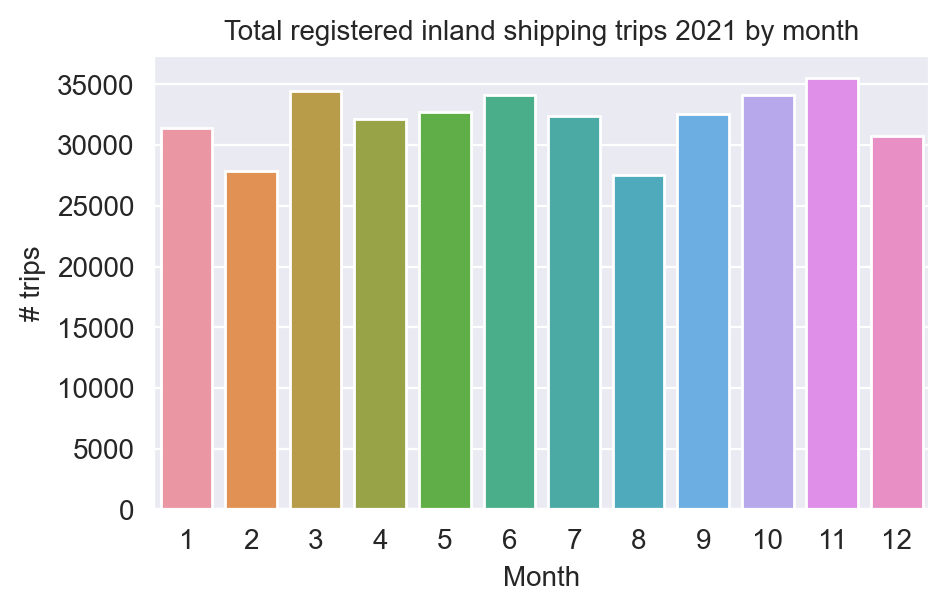

In [21]:
count = df_2021.groupby(by='Maand').count()
fig, ax = plt.subplots(dpi=200, figsize=(5,3))
# colors=sns.color_palette('colorblind')
sns.barplot(x=count.index, y=count.Jaarmaand, ax=ax)
plt.title('Total registered inland shipping trips 2021 by month', fontsize=10)
ax.set_xlabel("Month")
ax.set_ylabel("# trips")
plt.show()

Text(0, 0.5, 'Total transported weight [tonnes]')

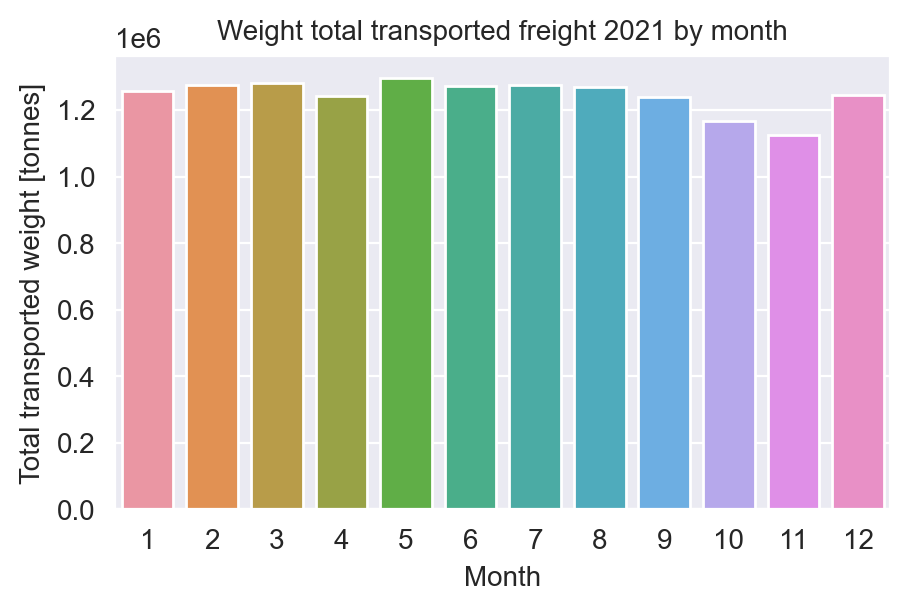

In [23]:
mean = df_2021.groupby(by='Maand').mean()
fig, ax = plt.subplots(dpi=200, figsize=(5,3))
sns.barplot(x=mean.index, y=mean.Transported_weight)
plt.title('Weight total transported freight 2021 by month', fontsize=10)
ax.set_xlabel("Month")
ax.set_ylabel("Total transported weight [tonnes]")

In [24]:
count = df_2021.groupby(by='v28_Beladingscode').count()
# fig, ax = plt.subplots(dpi=200, figsize=(5,3))
# sns.barplot(x=mean.index, y=mean.v38_Vervoerd_gewicht)
# plt.title('Weight total transported freight 2021 by month', fontsize=10)

### Most frequented destinations

In [25]:
df_2021

,Jaarmaand,Jaar,Maand,Week_no,Date,v05_06_Begindt_evenement,Origin,Destination,Type_code_ship,SK_CODE,Transport_capacity,v28_Beladingscode,Transported_weight,Transported_containers,nstr_nw,nst2007_nw
7,2101,2021,1,53,2021-01-01 00:00:00+00:00,NaN,NLAMS,BEANR,2,M12,8000.0,3,0.0,0,3.0,7.4
8,2101,2021,1,53,2021-01-01 00:00:00+00:00,NaN,BEANR,NLTNZ,2,M8,3100.0,3,0.0,0,8.0,8.2
9,2101,2021,1,53,2021-01-01 00:00:00+00:00,NaN,NLRTM,DEWOR,4,M8,1160.0,7,604000.0,0,8.0,8.3
10,2101,2021,1,53,2021-01-01 00:00:00+00:00,NaN,DESGW,NLRTM,26,BII-6b,17050.0,5,0.0,0,9.0,16
11,2101,2021,1,53,2021-01-01 00:00:00+00:00,NaN,BEANR,NLRTM,4,M8,900.0,3,0.0,0,3.0,7.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414141,2112,2021,12,52,2021-12-31 22:00:00+00:00,31 december 2021 23:00:00 uur,NLRTM,BEGNE,2,M10,3940.0,7,3392000.0,0,3.0,7.2
414142,2112,2021,12,52,2021-12-31 22:00:00+00:00,31 december 2021 23:00:00 uur,DEMHG,BEANR,2,M9,3510.0,3,0.0,0,3.0,7.2
414143,2112,2021,12,52,2021-12-31 22:00:00+00:00,31 december 2021 23:00:00 uur,NLRTM,BEGNE,2,M9,4290.0,7,2000000.0,0,8.0,8.5
414144,2112,2021,12,52,2021-12-31 22:00:00+00:00,31 december 2021 23:00:00 uur,NLRTM,DEDUI,1,M11,5210.0,7,2187044.0,276,9.0,12.1


In [27]:
dests = df_2021.groupby(by='Origin').count().sort_values('Jaarmaand',ascending=False)[:10]
depa = df_2021.groupby(by='Destination').count().sort_values('Jaarmaand',ascending=False)[:10]

dests_20 = df_2021.groupby(by='Destination').count().sort_values('Jaarmaand',ascending=False)[:20]
depa_20 = df_2021.groupby(by='Origin').count().sort_values('Jaarmaand',ascending=False)[:20]

In [28]:
print("Share of top 10 dests =", (dests.Jaarmaand.sum()/len(df_2021)*100))
print("Share of top 10 depa =", (dests.Jaarmaand.sum()/len(df_2021)*100))

print("Share of top 20 dests =", (dests_20.Jaarmaand.sum()/len(df_2021)*100))
print("Share of top 20 depa =", (dests_20.Jaarmaand.sum()/len(df_2021)*100))

Share of top 10 dests = 43.77963130102808
Share of top 10 depa = 43.77963130102808
Share of top 20 dests = 49.96187482493542
Share of top 20 depa = 49.96187482493542


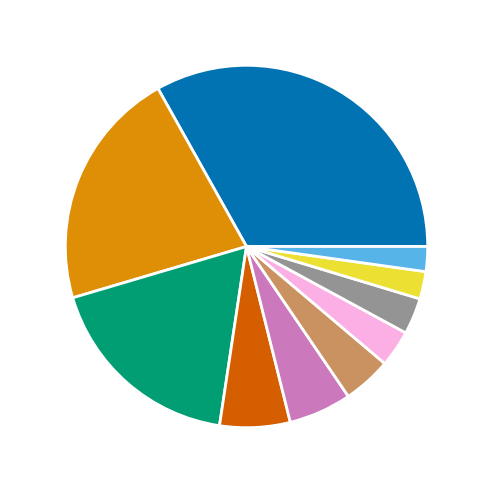

In [29]:
fig, ax = plt.subplots(dpi=200, figsize=(5,3))
colors = sns.color_palette('colorblind')
ax = plt.pie(dests.Jaarmaand, colors=colors)
plt.show()

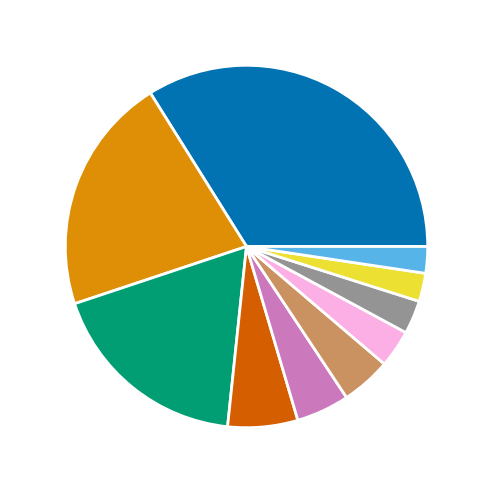

In [30]:
fig, ax = plt.subplots(dpi=200, figsize=(5,3))
colors = sns.color_palette('colorblind')
ax = plt.pie(depa.Jaarmaand, colors=colors)
plt.show()

### All trips ranked by mostly executed

In [32]:
all_trips_ranked=df_2021.groupby(by=['Origin','Destination']).count().reset_index().sort_values(by='Jaarmaand',ascending=False).iloc[:,:3].reset_index(drop=True)
all_trips_ranked['Percentage_total_trips']=(all_trips_ranked['Jaarmaand']/len(df_2021))*100

In [33]:
all_trips_ranked.head(20)

,Origin,Destination,Jaarmaand,Percentage_total_trips
0,BEANR,NLRTM,9816,2.545828
1,NLRTM,BEANR,8938,2.318114
2,NLRTM,NLAMS,4988,1.293662
3,NLAMS,NLRTM,4972,1.289513
4,BEANR,BEGNE,3441,0.892440
5,BEANR,NLAMS,2093,0.542830
6,BEGNE,BEANR,2024,0.524934
7,NLAMS,BEANR,1798,0.466320
8,NLRTM,NLRTM,1796,0.465801
9,NLVLI,BEANR,1720,0.446090


In [35]:
df_2021

,Jaarmaand,Jaar,Maand,Week_no,Date,v05_06_Begindt_evenement,Origin,Destination,Type_code_ship,SK_CODE,Transport_capacity,v28_Beladingscode,Transported_weight,Transported_containers,nstr_nw,nst2007_nw
7,2101,2021,1,53,2021-01-01 00:00:00+00:00,NaN,NLAMS,BEANR,2,M12,8000.0,3,0.0,0,3.0,7.4
8,2101,2021,1,53,2021-01-01 00:00:00+00:00,NaN,BEANR,NLTNZ,2,M8,3100.0,3,0.0,0,8.0,8.2
9,2101,2021,1,53,2021-01-01 00:00:00+00:00,NaN,NLRTM,DEWOR,4,M8,1160.0,7,604000.0,0,8.0,8.3
10,2101,2021,1,53,2021-01-01 00:00:00+00:00,NaN,DESGW,NLRTM,26,BII-6b,17050.0,5,0.0,0,9.0,16
11,2101,2021,1,53,2021-01-01 00:00:00+00:00,NaN,BEANR,NLRTM,4,M8,900.0,3,0.0,0,3.0,7.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414141,2112,2021,12,52,2021-12-31 22:00:00+00:00,31 december 2021 23:00:00 uur,NLRTM,BEGNE,2,M10,3940.0,7,3392000.0,0,3.0,7.2
414142,2112,2021,12,52,2021-12-31 22:00:00+00:00,31 december 2021 23:00:00 uur,DEMHG,BEANR,2,M9,3510.0,3,0.0,0,3.0,7.2
414143,2112,2021,12,52,2021-12-31 22:00:00+00:00,31 december 2021 23:00:00 uur,NLRTM,BEGNE,2,M9,4290.0,7,2000000.0,0,8.0,8.5
414144,2112,2021,12,52,2021-12-31 22:00:00+00:00,31 december 2021 23:00:00 uur,NLRTM,DEDUI,1,M11,5210.0,7,2187044.0,276,9.0,12.1


In [36]:
df_2021.Date[7]

Timestamp('2021-01-01 00:00:00+0000', tz='UTC')

In [37]:
df_2021['hour']=df_2021.Date.apply(lambda i: i.hour)

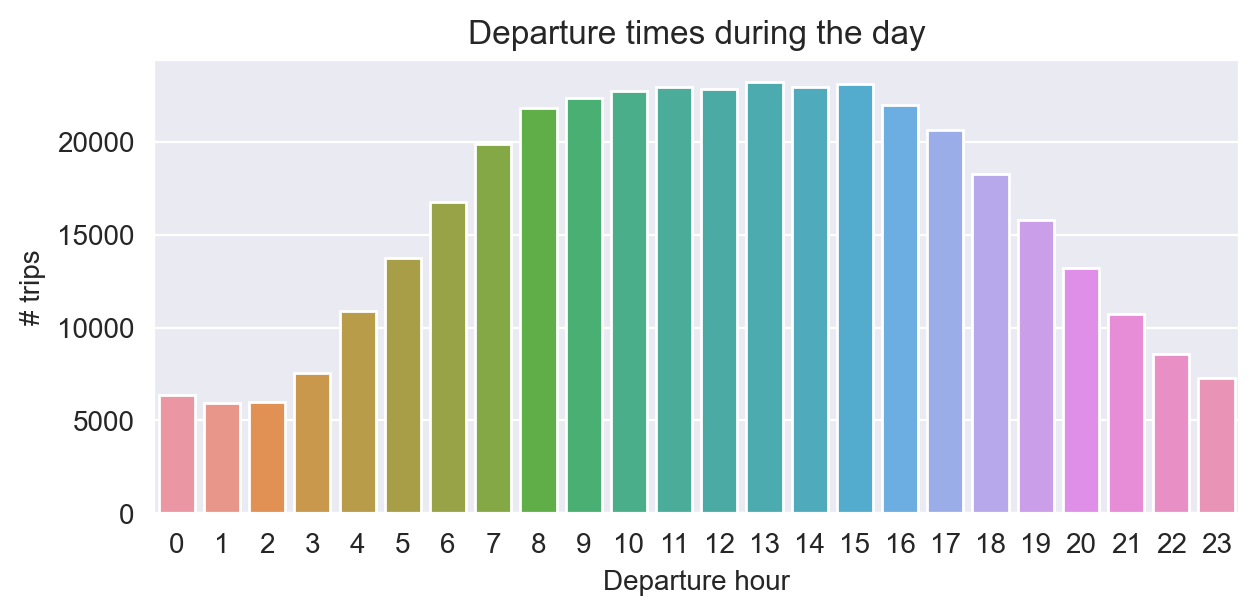

In [38]:
fig, ax = plt.subplots(dpi=200, figsize=(7,3))
sns.barplot(x=df_2021.groupby(by='hour').count().Jaarmaand.index, y=df_2021.groupby(by='hour').count().Jaarmaand.values, ax=ax)
plt.title('Departure times during the day')
ax.set_xlabel('Departure hour')
ax.set_ylabel('# trips')
plt.show()